In [57]:
## Let's import the "Usual Suspects"
from scipy.stats import expon, poisson, binom, norm
import pandas as pd
import seaborn as sns
import numpy as np

## The Log-Normal Distribution

In [2]:
df_hosp = pd.read_csv("waiting_time.csv")

<AxesSubplot:ylabel='Count'>

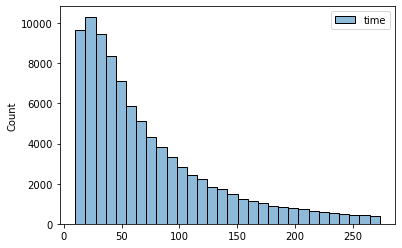

In [3]:
sns.histplot(df_hosp, bins=30)

<AxesSubplot:ylabel='Density'>

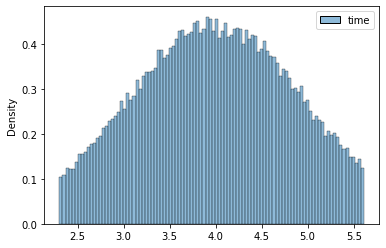

In [5]:
log_waiting_time = np.log(df_hosp)
sns.histplot(log_waiting_time, bins=100, stat="density")

In [6]:
print(f"Mean: {log_waiting_time.mean()}")
print(f"STD: {log_waiting_time.std()}")

Mean: time    3.986117
dtype: float64
STD: time    0.790491
dtype: float64


## Supply Chain

In [7]:
df = pd.read_csv("toothpaste.csv")

In [8]:
df.head()

sales
0   1274
1   1210
2   1036
3    966
4   1500

<AxesSubplot:ylabel='Count'>

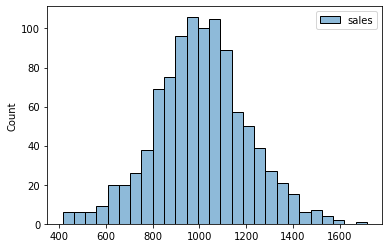

In [9]:
sns.histplot(df)

In [14]:
mu = df.mean()
std = df.std()

print(f"Mean: {df.mean()}")
print(f"Mean: {df.std()}")

Mean: sales    1006.336
dtype: float64
Mean: sales    199.152557
dtype: float64


Suppose the store has **beginning on-hand (BOH)** inventory of 1300. If the demand is more than the BOH, there is a need for stock **replenishment**. 

Suppose there are 2000 stores, each with BOH of 1300. The **distribution center (DC)** needs to calculate the number of stores which might need replenishment before next Sunday. Which distribution best characterizes this number?

In [15]:
## Probability that a store sells more than 1300 toothpastes 
##  - P(X > 1300) = 1 - P(X <= 1300)
z = (1300 -  mu) / std
print(1 - norm.cdf(z))

[0.07016435]


In [17]:
n = 2000
p = 1 - norm.cdf(z)

## Binomial!!!
# We are tossing a coin 2000 times, and the probability of heads is 0.07.
# How many heads can I expect?
print("Expected number of stores: ", n * p)

Expected number of stores:  [140.32870615]


In [18]:
## Airline problem
print(f"Prob: {1 - binom.cdf(n=52, k = 1, p = 0.05)}")

Prob: 0.7405030708792849


In [20]:
print(f"Prob: {binom.cdf(n=52, k = 50, p = 0.95)}")

Prob: 0.7405030708792848


In [69]:
## This works becasue the two conditions are satisfied:
## a) p <= 0.05, 
## b) n >= 30
print(f"Prob: {1 - poisson.cdf(k=1, mu = (0.05 * 52) )}")

Prob: 0.7326151184283981


In [68]:
## Won't work because p > 0.05
print(f"Prob: {poisson.cdf(k=50, mu = (0.95 * 52) )}")

Prob: 0.571270939904176


In [29]:
## Blood test problem
pool_size = 10
py = binom.pmf(n = pool_size, k = 0, p = 0.1)
expected_num = py * 1 + (1-py) * (pool_size+1)
print(f"probability that the first test shows healthy blood: {py}")
print(f"Expected number of tests conducted: {expected_num}")
print(f"Number of tests saved: {pool_size - np.ceil(expected_num)}")

probability that the first test shows healthy blood: 0.3486784401000001
Expected number of tests conducted: 7.5132155990000005
Number of tests saved: 2.0


In [33]:
## Blood test problem
for pool_size in range(1, 11):
    py = binom.pmf(n = pool_size, k = 0, p = 0.1)
    expected_num = py * 1 + (1-py) * (pool_size+1)
    #print(f"probability that the first test shows healthy blood: {py}")
    #print(f"Expected number of tests conducted: {expected_num}")
    print(f"Number of tests saved: {pool_size - np.ceil(expected_num)}")

Number of tests saved: -1.0
Number of tests saved: 0.0
Number of tests saved: 1.0
Number of tests saved: 1.0
Number of tests saved: 1.0
Number of tests saved: 2.0
Number of tests saved: 2.0
Number of tests saved: 2.0
Number of tests saved: 2.0
Number of tests saved: 2.0


In [41]:
## Coin
def biased_coin():
    array = ["H"] * 7 + ["T"] * 3
    return np.random.choice(array)

In [47]:
print(biased_coin())

H


In [53]:
def fair_coin():
    result = biased_coin()
    
    ct1 = biased_coin()
    ct2 = biased_coin()
    
    outcome = ct1 + ct2
    
    if outcome == "HT" or outcome == "TH":
        ## X Has happened!!
        if outcome == "HT":
            return "H"
        else:
            return "T"
    else:
        return fair_coin()
        
print(fair_coin())

T


In [54]:
num_trials = 10000
x = np.array([fair_coin() for i in range(num_trials)])
den = len(x)
num = len(x[x == "H"])

print("prob: ", num/den)

prob:  0.4876


In [56]:
num_trials = 10000
x = np.array([biased_coin() for i in range(num_trials)])
den = len(x)
num = len(x[x == "H"])

print("prob: ", num/den)

prob:  0.6955


In [59]:
print("P(X <= 6): ", expon.cdf(6, scale=2))

P(X <= 6):  0.950212931632136


In [58]:
help(expon.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [74]:
z = (28 - 21) / np.sqrt(14.7)
print("Prob: ", 1 - norm.cdf(z))

Prob:  0.0339445774309145


In [72]:
print("Prob: ", 1 - binom.cdf(k=27, n=70, p=0.3))

Prob:  0.047579969927445065


In [75]:
z = (875 - 900)/50 * np.sqrt(20)
print("Prob: ", norm.cdf(z))

Prob:  0.012673659338734126
